# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### load dataset

In [2]:
df=pd.read_csv('drug200.csv')

In [3]:
df.head() # show some first rows of data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.tail() # Show last rows of data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Observation**
- There is total **6** Columns
- **4** categorical variables
- **2** continous variable


### checking the missing value in data set

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**Observation**
- there is no null value in dataset

In [7]:
df.shape # check the size of datd

(200, 6)

**Observation**
- there is 200 Rows and 6 columns in dataset

# Lets Do Some EDA

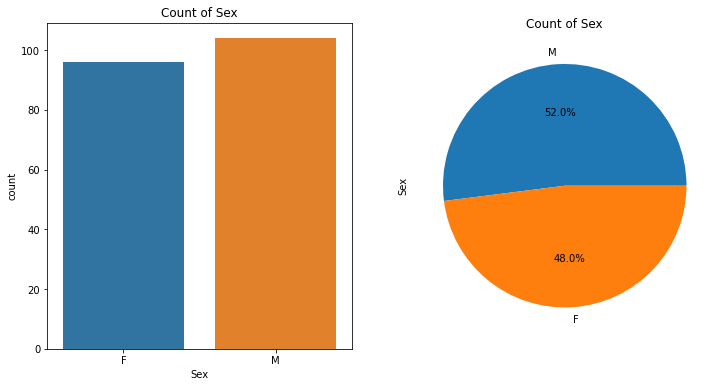

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=df,x=df.Sex)
plt.title("Count of Sex")

plt.subplot(1,2,2)
df.Sex.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title("Count of Sex")

plt.show()

**Observation**
- Male ratio is high about **52%**

<AxesSubplot:title={'center':'Cholesterol Gender Wise'}, ylabel='Cholesterol'>

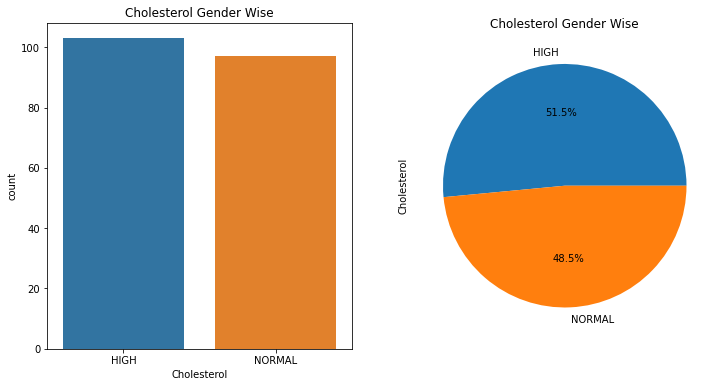

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Cholesterol Gender Wise")
sns.countplot(data=df,x=df.Cholesterol)

plt.subplot(1,2,2)
plt.title("Cholesterol Gender Wise")

df.Cholesterol.value_counts().plot(kind='pie',autopct='%.1f%%')



**Observation**
- The Cholesterol Level of **Male** is high


<AxesSubplot:title={'center':'Cholesterol Gender Wise'}, xlabel='Cholesterol', ylabel='count'>

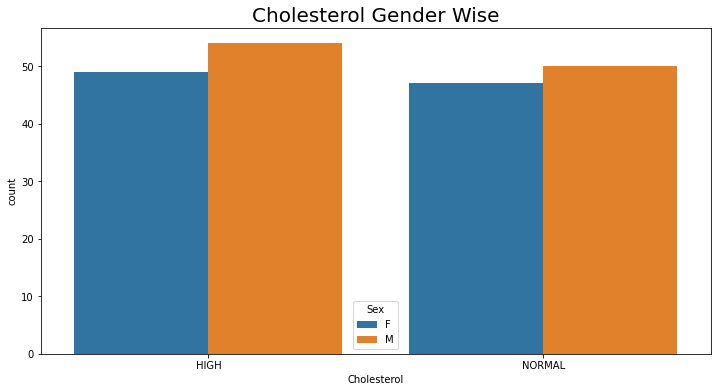

In [10]:
plt.figure(figsize=(12,6))
plt.title("Cholesterol Gender Wise",fontsize=20)
sns.countplot(data=df,x=df.Cholesterol,hue='Sex')


**Observation**
-  Chloestrol level high and normal both are male 

<AxesSubplot:title={'center':'BP level'}, ylabel='BP'>

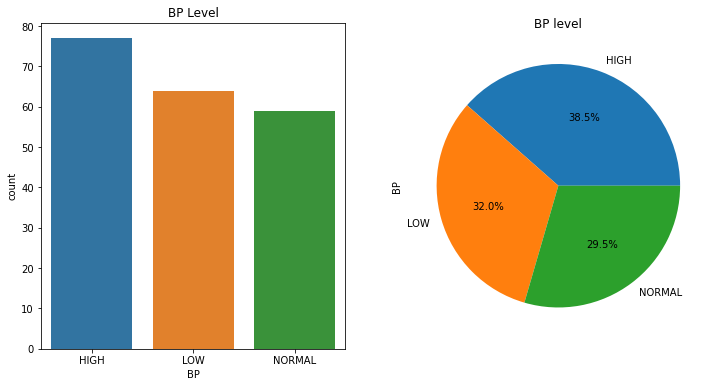

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("BP Level")
sns.countplot(data=df,x=df.BP)

plt.subplot(1,2,2)
plt.title("BP level")

df.BP.value_counts().plot(kind='pie',autopct='%.1f%%')

**Observation**
- 38% people BP is high
- 32% people BP is low
- 29 people BP is Normal

<AxesSubplot:title={'center':'BP Level Gender Wise'}, xlabel='BP', ylabel='count'>

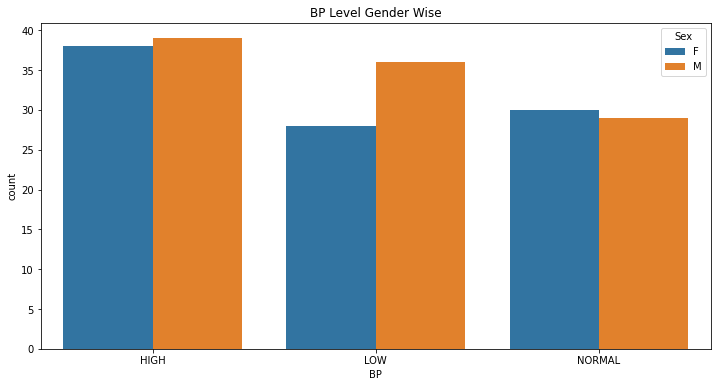

In [12]:
plt.figure(figsize=(12,6))
plt.title("BP Level Gender Wise")
sns.countplot(data=df,x=df.BP,hue="Sex")

**Observation**
- Almost Male and female BP is high
- female BP is low

<AxesSubplot:title={'center':'Drugs'}, ylabel='Drug'>

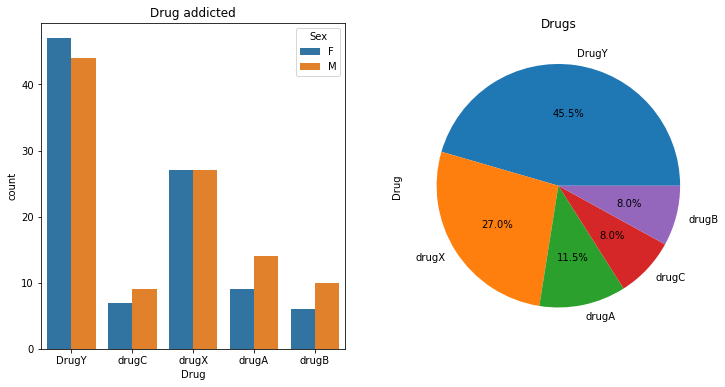

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Drug addicted")
sns.countplot(data=df,x=df.Drug,hue="Sex")

plt.subplot(1,2,2)
plt.title("Drugs")

df.Drug.value_counts().plot(kind='pie',autopct='%.1f%%')

**Observation**
- male used more drugs then female
- DrugY Used most
- druX used both male and female is same ratio

Text(0.5, 1.0, 'Male & Female Used Drug type')

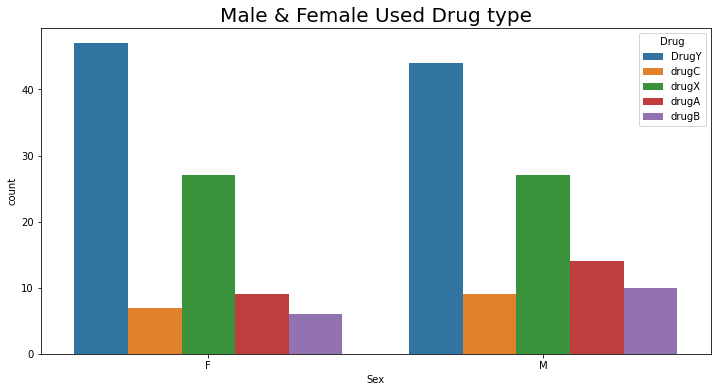

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x=df.Sex,hue='Drug')
plt.title("Male & Female Used Drug type", fontsize=20)

**Observation**
- both Male & female used **Drugy** in maximum quantity

## Lets do Pre-procesing

In [15]:
le=LabelEncoder()
# label the data
df["Sex"]=le.fit_transform(df["Sex"])
df["BP"]=le.fit_transform(df["BP"])
df["Cholesterol"]=le.fit_transform(df["Cholesterol"])
df["Drug"]=le.fit_transform(df["Drug"])

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


**Observation**
- now our dataset is label and convert into numerical form

## Spliting the data into feature and Target Variable

In [17]:
x=df.drop(labels='Drug',axis=1)
y=df.Drug

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## LogisticRegressionCV Model

In [19]:
lr=LogisticRegressionCV()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print("----------------")
print(classification_report(y_pred,y_test))

Accuracy: 0.96
----------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       1.00      1.00      1.00         6
           2       1.00      0.75      0.86         4
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00        15

    accuracy                           0.96        50
   macro avg       0.96      0.94      0.94        50
weighted avg       0.96      0.96      0.96        50



In [20]:
lr=LogisticRegressionCV(random_state=42)
model=cross_val_score(lr,X_train,y_train,cv=5)
lr.fit(X_train,y_train)
print("Traing Accuracy",np.mean(model))
print("Testing Accuracy",lr.score(X_test,y_test))

Traing Accuracy 0.9333333333333333
Testing Accuracy 0.96


# RandomForestClassifier Model

In [23]:
print("Random Forest")
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

Random Forest
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [24]:
rf=RandomForestClassifier(random_state=42)
model=cross_val_score(rf,X_train,y_train,cv=5)
rf.fit(X_train,y_train)
print("Training Accuracy",np.mean(model))
print("Testing Accuracy",rf.score(X_test,y_test))

Training Accuracy 0.9866666666666667
Testing Accuracy 1.0


InvalidIndexError: (slice(None, None, None), None)

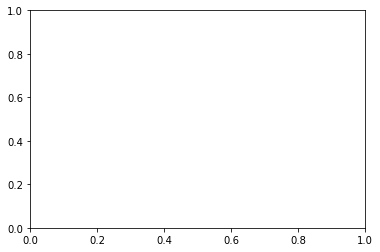